In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
file = 'airbnb.xlsx'

# assign dataset to a variable
pd.set_option('display.max_columns', None)
df = pd.read_excel(file)

# view first 20 rows of the dataset
df.head(5)

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


#### sampling out test set from the data set to reduce risk of data leakage

In [3]:
# import relevant library
from sklearn.model_selection import train_test_split

# set random seed
seed = 234

# split out the test and train sets from the data
Train, Test = train_test_split(df, test_size=.33, random_state=seed)

In [4]:
# save Test set to local machine
Test.to_csv('airbnbTest.csv')

In [5]:
# save Train set to local machine
Train.to_csv('airbnbTrain.csv')

### EDA the original dataset - df

In [6]:
# analyse the percentage missing values of each variable from the original datasets
df.isnull().mean()

Host Id                       0.000000
Host Since                    0.000098
Name                          0.000000
Borough                       0.000000
Property Type                 0.000098
Review Scores Rating (bin)    0.273082
Room Type                     0.000000
Zipcode                       0.004397
Beds                          0.002789
Number of Records             0.000000
Number Of Reviews             0.000000
Price                         0.000000
Review Scores Rating          0.273082
dtype: float64

In [7]:
len(df)

30478

In [8]:
# Analyse descriptive stats of numerical variables
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,163.589737,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,197.785454,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,10.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,80.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,125.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,195.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,10000.000000,100.000000


#### visualise distribution of each numerical variable using histogram

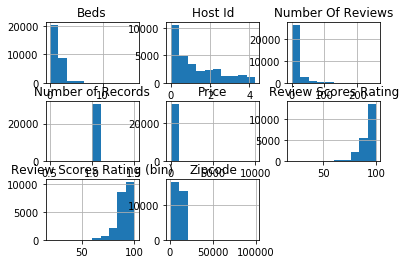

In [9]:
df.hist()
plt.show()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


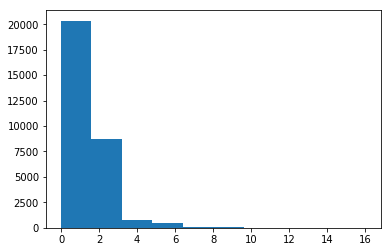

In [10]:
# the distribution of beds. Plotted with plt so as not to tamper with the missing values yet
plt.hist(df['Beds'])
plt.show()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


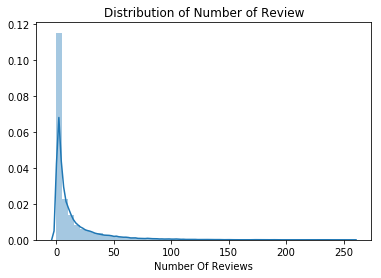

In [11]:
# the distribution of Number Of Reviews
sns.distplot(df['Number Of Reviews'], kde=True).set_title('Distribution of Number of Review')
plt.show()

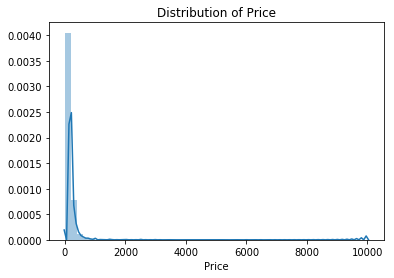

In [12]:
# the distribution of Price
#plt.hist(df['Price'])
sns.distplot(df['Price'], kde=True).set_title('Distribution of Price')
plt.show()

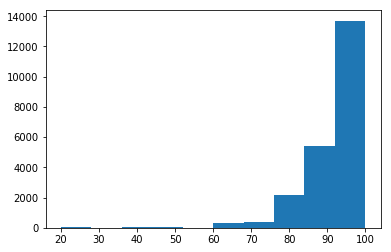

In [13]:
# the distribution of Review Scores Rating
plt.hist(df['Review Scores Rating'])
plt.show()

##### Let's See our data on Boxplot

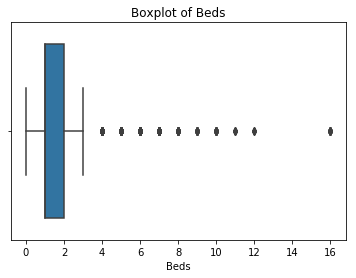

In [14]:
# the distribution of Price
sns.boxplot(df['Beds']).set_title('Boxplot of Beds')
plt.show()

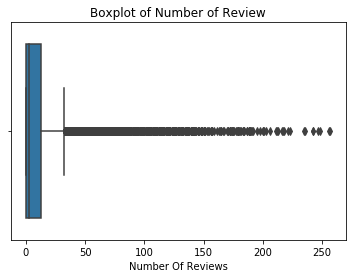

In [15]:
# the distribution of Number Of Reviews
sns.boxplot(df['Number Of Reviews']).set_title('Boxplot of Number of Review')
plt.show()

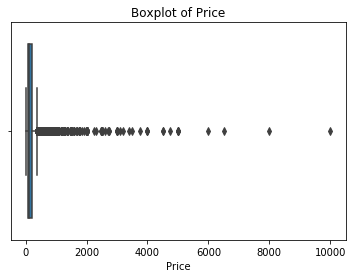

In [16]:
# the distribution of Price
sns.boxplot(df['Price']).set_title('Boxplot of Price')
plt.show()

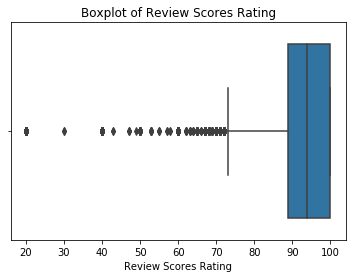

In [17]:
# the distribution of Review Scores Rating
sns.boxplot(df['Review Scores Rating']).set_title('Boxplot of Review Scores Rating')
plt.show()

#### Faceting Price with some categorical variables.

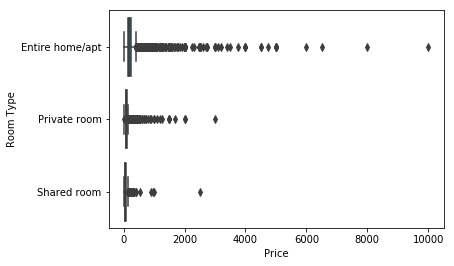

In [18]:
# Faceting Price and Room Type
sns.boxplot(df['Price'], df['Room Type'])
plt.show()

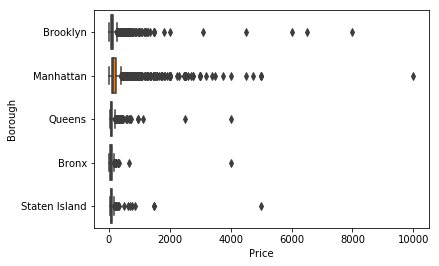

In [19]:
# Faceting Price and Neighbourhood (for some reason, yet unknown, Seaborn is unable to plot this graph)
sns.boxplot(df['Price'], df['Borough'])
plt.show()

#### Analyse association of numerical variables to Price

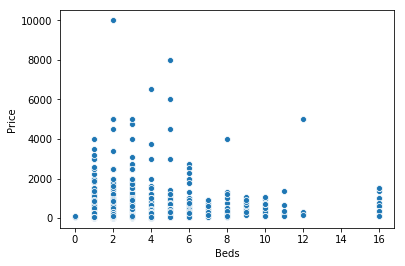

In [20]:
# Association between Beds and Price
sns.scatterplot('Beds', 'Price', data=df)
plt.show()

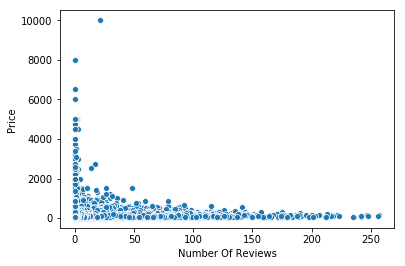

In [21]:
# Association between Number Of Reviews and Price
sns.scatterplot('Number Of Reviews', 'Price', data=df)
plt.show()

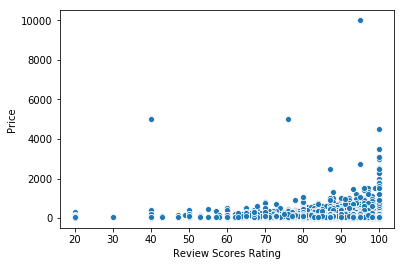

In [22]:
# Association between Review Scores Rating and Price
sns.scatterplot('Review Scores Rating', 'Price', data=df)
plt.show()

In [23]:
df.corr(method='pearson')

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
Host Id,1.000000,-0.027060,-0.010191,-0.003232,NaN,-0.273226,-0.041046,-0.053590
Review Scores Rating (bin),-0.027060,1.000000,0.023669,-0.075283,NaN,-0.062684,0.059740,0.987201
Zipcode,-0.010191,0.023669,1.000000,0.015414,NaN,-0.018328,-0.118857,0.022110
Beds,-0.003232,-0.075283,0.015414,1.000000,NaN,0.045795,0.316313,-0.070923
Number of Records,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number Of Reviews,-0.273226,-0.062684,-0.018328,0.045795,NaN,1.000000,-0.040600,-0.015185
Price,-0.041046,0.059740,-0.118857,0.316313,NaN,-0.040600,1.000000,0.060703
Review Scores Rating,-0.053590,0.987201,0.022110,-0.070923,NaN,-0.015185,0.060703,1.000000


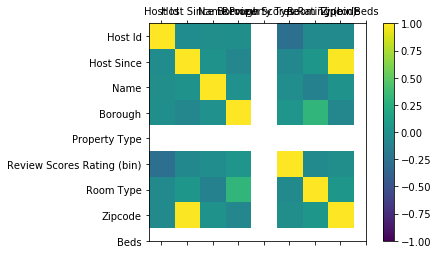

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

### Data Preparation - performed on a copy of the Train set

In [25]:
train_copy = Train.copy()
train_copy.head()

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
14983,8235445,2013-08-18,Downtown Brooklyn Living,Brooklyn,Apartment,85.0,Entire home/apt,11201.0,4.0,1,28,163,87.0
14303,7452455,2013-07-13,MANHATTAN STUDIO 10 MIN TO DOWNTOWN,Manhattan,Apartment,85.0,Entire home/apt,10035.0,3.0,1,32,206,85.0
5560,1689781,2012-02-02,1 bedroom by Riverbank Park,Manhattan,Apartment,90.0,Private room,10031.0,1.0,1,4,90,90.0
6603,2202858,2012-04-23,Bright One Bed Apt,Brooklyn,Apartment,NaN,Entire home/apt,11225.0,1.0,1,0,110,NaN
30233,41938451,2015-08-19,"Clean, Modern, Brooklyn Apt",Brooklyn,Apartment,100.0,Private room,11213.0,1.0,1,3,70,100.0


### Preparing Property Type variable to improve modeling
* House, Condominium, Townhouse, Villa, Bungalow, Chalet, Castle will be converted to House.
* Dorm, Camper/RV, Treehouse, Tent, Hut and Lighthouse will be converted to Mini_house.
* Apartment, Bed & Breakfast, Other, Loft will be converted to Apartment.
* Boat, Cabin will be converted to Conveyance

In [26]:
# unique values in property type
train_copy['Property Type'].unique().tolist()

['Apartment',
 'Loft',
 'House',
 'Condominium',
 'Townhouse',
 'Bed & Breakfast',
 'Tent',
 'Other',
 'Dorm',
 'Treehouse',
 'Camper/RV',
 'Boat',
 'Chalet',
 'Villa',
 'Bungalow',
 'Cabin',
 'Hut',
 nan]

In [27]:
# Room Type
# all Entire home/apt will be converted to Private room
train_copy['Room Type'].unique().tolist()

['Entire home/apt', 'Private room', 'Shared room']

#### I will like to make prediction with the review scores rating being in continuous form so as to see the effect of 1 change in reviews scores rating on price

In [28]:
train_copy['Review Scores Rating'].unique().tolist()

[87.0,
 85.0,
 90.0,
 nan,
 100.0,
 93.0,
 80.0,
 95.0,
 91.0,
 86.0,
 96.0,
 94.0,
 98.0,
 89.0,
 40.0,
 82.0,
 88.0,
 76.0,
 97.0,
 77.0,
 84.0,
 92.0,
 70.0,
 81.0,
 72.0,
 99.0,
 65.0,
 83.0,
 73.0,
 74.0,
 79.0,
 60.0,
 75.0,
 53.0,
 30.0,
 67.0,
 78.0,
 71.0,
 69.0,
 20.0,
 50.0,
 68.0,
 43.0,
 58.0,
 64.0,
 62.0,
 57.0,
 66.0,
 47.0,
 55.0,
 49.0]

**Preprocessing on Host Since**
* Use the year values of 'Host Since' and convert it to age of Host to see if there's an effect in the number of years a host has been on airbnb in determining price of a home.
* Assumes it's year 2015 and so the oldest host will have an age of 8 and so on

In [29]:
train_copy.head(1)

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
14983,8235445,2013-08-18,Downtown Brooklyn Living,Brooklyn,Apartment,85.0,Entire home/apt,11201.0,4.0,1,28,163,87.0


In [30]:
# remove irrelevant features
train_copy.drop(['Host Id', 'Name', 'Review Scores Rating (bin)', 'Zipcode', 'Number of Records'], axis=1, inplace=True)
train_copy.head(4)

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
14983,2013-08-18,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0
14303,2013-07-13,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0
5560,2012-02-02,Manhattan,Apartment,Private room,1.0,4,90,90.0
6603,2012-04-23,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN


##### Convert Host Since to Years and then no. of years a host has been on Airbnb

In [31]:
# Convert Host Since to Years (named it Age already)
train_copy['Host Since'] = train_copy['Host Since'].map(lambda x: x.year)
train_copy.head()

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
14983,2013.0,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0
14303,2013.0,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0
5560,2012.0,Manhattan,Apartment,Private room,1.0,4,90,90.0
6603,2012.0,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN
30233,2015.0,Brooklyn,Apartment,Private room,1.0,3,70,100.0


In [32]:
# fill up Age attribute NAs with the mode value 2015 to allow for easier calculation later
train_copy['Host Since'].fillna(train_copy['Host Since'].mode()[0], inplace=True)
train_copy.head()

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
14983,2013.0,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0
14303,2013.0,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0
5560,2012.0,Manhattan,Apartment,Private room,1.0,4,90,90.0
6603,2012.0,Brooklyn,Apartment,Entire home/apt,1.0,0,110,NaN
30233,2015.0,Brooklyn,Apartment,Private room,1.0,3,70,100.0


In [33]:
# convert values in Age attribute to integer
train_copy['Host Since'] = train_copy['Host Since'].fillna(0.0).astype(int)
train_copy.head(3)

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
14983,2013,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0
14303,2013,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0
5560,2012,Manhattan,Apartment,Private room,1.0,4,90,90.0


In [34]:
# convert the years to number of years
train_copy['Host Since'] = 2015 - train_copy['Host Since']
train_copy.head(3)

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
14983,2,Brooklyn,Apartment,Entire home/apt,4.0,28,163,87.0
14303,2,Manhattan,Apartment,Entire home/apt,3.0,32,206,85.0
5560,3,Manhattan,Apartment,Private room,1.0,4,90,90.0


In [35]:
train_copy.isnull().sum()

Host Since                 0
Borough                    0
Property Type              2
Room Type                  0
Beds                      55
Number Of Reviews          0
Price                      0
Review Scores Rating    5603
dtype: int64

##### Merging values of some attributes to one. This will reduce noise and also for better performance in modelling.

In [36]:
# For Property Type
# House, Condominium, Townhouse, Villa, Bungalow, Chalet, Castle will be converted to House (They are all similar to being just a house). 
# Dorm, Camper/RV, Treehouse, Tent, Hut and Lighthouse will be converted to Mini_house.
# Apartment, Bed & Breakfast, Other, Loft will be converted to Apartment.
# Boat, Cabin will be converted to Conveyance
#df['Propety_Type'] = 
train_copy['Property Type'].replace({'Condominium' : 'House', 'Townhouse' : 'House', 'Villa' : 'House', 'Bungalow' : 'House', 'Chalet' : 'House', 'Castle' : 'House',
                                               'Dorm' : 'Mini_house', 'Camper/RV' : 'Mini_house', 'Treehouse' : 'Mini_house', 'Tent' : 'Mini_house', 'Hut' : 'Mini_house', 'Lighthouse' : 'Mini_house',
                                               'Bed' : 'Apartment', 'Bed & Breakfast' : 'Apartment', 'Other' : 'Apartment', 'Loft': 'Apartment',
                                               'Boat' : 'Conveyance', 'Cabin' : 'Conveyance'}, inplace=True)
train_copy['Property Type'].unique().tolist()

['Apartment', 'House', 'Mini_house', 'Conveyance', nan]

In [37]:
# For Room Type
# all Entire home/apt will be converted to Private room
train_copy['Room Type'].replace({'Entire home/apt' : 'Private room'}, inplace=True)
train_copy['Room Type'].unique().tolist()

['Private room', 'Shared room']

In [38]:
# Checking correlation between predictors and the target (train set)
trainCorr = train_copy.corr()
trainCorr.Price.sort_values(ascending=False)

Price                   1.000000
Beds                    0.311338
Review Scores Rating    0.055657
Host Since              0.022829
Number Of Reviews      -0.036072
Name: Price, dtype: float64

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


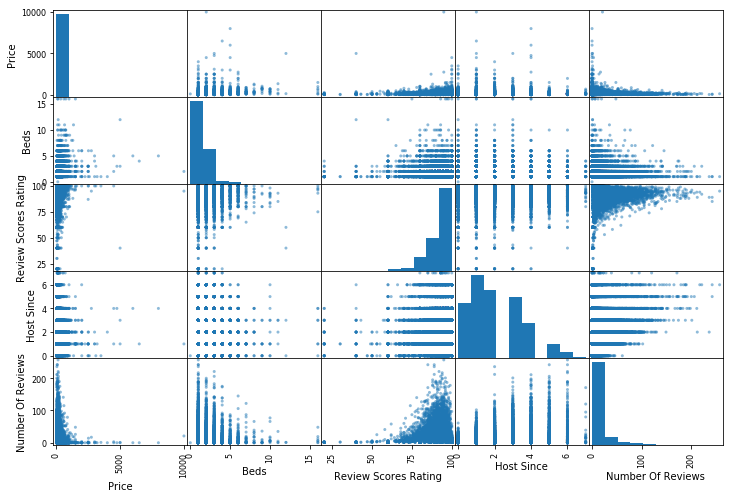

In [40]:
# scatter matrix on the train set
from pandas import scatter_matrix

attributes = ['Price', 'Beds', 'Review Scores Rating', 'Host Since', 'Number Of Reviews']

scatter_matrix(train_copy[attributes], figsize=(12,8))
plt.show()

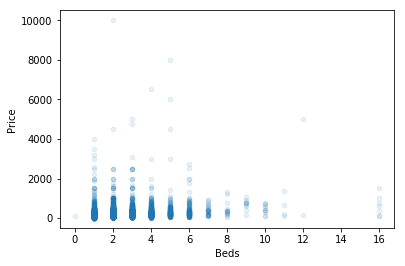

In [41]:
# look deeper into Beds (train set)
train_copy.plot(kind='scatter', x='Beds', y='Price', alpha=.1)
plt.show()

##### Impute Missing Values

In [42]:
# Label encode all categorical variables to prepare for estimating missing values
train_copy['Borough'].replace({'Brooklyn' : 1, 'Manhattan' : 2, 'Queens' : 3, 'Bronx' : 4, 'Staten Island' : 5}, inplace=True)
train_copy['Room Type'].replace({'Private room' : 1, 'Shared room' : 2}, inplace=True)
train_copy['Property Type'].replace({'Apartment' : 1, 'House' : 2, 'Mini_house' : 3, 'Conveyance' : 4}, inplace=True)
train_copy.head()

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
14983,2,1,1.0,1,4.0,28,163,87.0
14303,2,2,1.0,1,3.0,32,206,85.0
5560,3,2,1.0,1,1.0,4,90,90.0
6603,3,1,1.0,1,1.0,0,110,NaN
30233,0,1,1.0,1,1.0,3,70,100.0


In [43]:
# Fill up missing values with mode and median.
# Mode for Property Type as it is a categorical variable
# Mode for Beds (it's the same value as the median)
# Median for Review Scores Rating. Due to the high amount of outliers, median is better for central tendency.
train_copy['Property Type'].fillna(train_copy['Property Type'].mode()[0], inplace=True)
train_copy['Beds'].fillna(train_copy['Beds'].mode()[0], inplace=True)
train_copy['Review Scores Rating'].fillna(train_copy['Review Scores Rating'].median(), inplace=True)

In [44]:
# check for null values in the data set
train_copy.isnull().sum()

Host Since              0
Borough                 0
Property Type           0
Room Type               0
Beds                    0
Number Of Reviews       0
Price                   0
Review Scores Rating    0
dtype: int64

##### Identifying and removing outliers

In [45]:
# Identify and remove possible outliers from the data
# converting Train set to arrays
trainA = train_copy.values # trainA means train set arrays

# import relevant library
from sklearn.neighbors import LocalOutlierFactor

# instantiate function
lof = LocalOutlierFactor()
ohat = lof.fit_predict(trainA)

# select non outliers
mask = ohat != -1
trainNO = trainA[mask, :] #trainNO means train set with no outliers

print(trainNO.shape)

(18607, 8)


In [46]:
# we can convert it back to pandas dataframe
trainNO = pd.DataFrame(trainNO, columns=list(train_copy.columns))
trainNO.head(4)

,Host Since,Borough,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
0,2.0,1.0,1.0,1.0,4.0,28.0,163.0,87.0
1,2.0,2.0,1.0,1.0,3.0,32.0,206.0,85.0
2,3.0,2.0,1.0,1.0,1.0,4.0,90.0,90.0
3,3.0,1.0,1.0,1.0,1.0,0.0,110.0,94.0


In [47]:
# Split out predictors from target variable
trainX = trainNO.drop(['Price'], axis=1)
trainY = trainNO['Price']
trainY.head()

0    163.0
1    206.0
2     90.0
3    110.0
4     70.0
Name: Price, dtype: float64

### CREATE PIPELINE FOR DIFFERENT TRANSFORMATONS ON TRAIN DATASET COPY

##### Pipeline for Numerical Variables
1. simpleImputer for misssing values (median)
2. StandardScaler for feature scaling

##### Pipeline for Categorical Variables
1. simpleImputer for misssing values (mode)
2. OneHotEncoder for creating dummy variables

In [48]:
# split out numerical predictors from trainX
numFeats = ['Beds', 'Number Of Reviews', 'Review Scores Rating', 'Host Since'] #numFeats means numerical feature columns
trainNum = trainX.loc[:, numFeats]
trainNum.head() # trainNum means trainset numerical predictors

,Beds,Number Of Reviews,Review Scores Rating,Host Since
0,4.0,28.0,87.0,2.0
1,3.0,32.0,85.0,2.0
2,1.0,4.0,90.0,3.0
3,1.0,0.0,94.0,3.0
4,1.0,3.0,100.0,0.0


In [49]:
# split out categorical predictors from trainX
catFeats = trainX.columns.drop(numFeats) # catFeats means categorical f
trainCat = trainX.loc[:, catFeats]
trainCat.head() # trainCat means train set's categorical predictors

,Borough,Property Type,Room Type
0,1.0,1.0,1.0
1,2.0,1.0,1.0
2,2.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


#### numpipe > catpipe > columntransformer > pipeline w/ model

In [50]:
# Pipeline for numerical predictors

# import relevant libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# instantiate Pipeline
numPipe = Pipeline([('ImputeNum', SimpleImputer(strategy='median')), ('Scaler', StandardScaler())])

In [51]:
# Pipeline for categorical predictors

# import relevant library
from sklearn.preprocessing import OneHotEncoder

# instantiate Pipeline
catPipe = Pipeline([('ImputeCat', SimpleImputer(strategy='most_frequent')), ('OneHot', OneHotEncoder())])

In [52]:
# Combine the two pipelines using Sklearn's ColumnTransformer

from sklearn.compose import ColumnTransformer

fullPipe = ColumnTransformer([('Nums', numPipe, numFeats), ('Cats', catPipe, catFeats)])

In [53]:
# run pipeline on trainX set
fullPipe.fit(trainX, trainY)
trainXPrep = fullPipe.transform(trainX) # trainXPrep means prepared train predictors
trainXPrep

array([[ 2.77330438,  0.68339773, -0.76841777, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.67173805,  0.86318165, -1.04278475, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5313946 , -0.39530577, -0.35686729, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.5313946 , -0.48519773,  1.01496762, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5313946 , -0.57508968,  0.19186667, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5313946 , -0.57508968,  0.19186667, ...,  0.        ,
         1.        ,  0.        ]])

### We will create a full pipeline that includes:
1. A transformer for the full data preparation.
2. The ColumnTransformer used to house the categorical and numerical variables and merge them together.
3. Use it to spot check some models on fitting the transformed data.

Then we run the pipeline on the Train data set before running it on our test set

In [54]:
# Build a custom sklearn transformer with 3 functions to prepare the data (drop features, replace 1, replace 2 and convert host to age.)

# import relevant libraries
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

# assign column index
host_in, hostsince_in, name_in, borough_in, property_in, reviewbin_in, room_in, zip_in, beds_in, records_in, review_in, price_in, rating_in = range(0, 13, 1)

class TidyData(BaseEstimator, TransformerMixin):
    def __init__(self, age_missing_values = True): # for hyperparameter if age has missing values
        self.age_missing_values = age_missing_values
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        # to convert year format in Host Since variable to number of years
        X.iloc[:, hostsince_in] = X.iloc[:, hostsince_in].map(lambda x: x.year) # create the variable
        if self.age_missing_values:
            X.iloc[:, hostsince_in].fillna(X.iloc[:, hostsince_in].mode()[0], inplace=True) # fill missing values, if any, with the mode value
        X.iloc[:, hostsince_in] = X.iloc[:, hostsince_in].fillna(0.0).astype(int) # convert values to integers
        X.iloc[:, hostsince_in] = 2015 - X.iloc[:, hostsince_in] # convert year to number of years (age)
        # to reduce unique values of Property Type and Room Type variables
        X.iloc[:, property_in].replace({'Condominium' : 'House', 'Townhouse' : 'House', 'Villa' : 'House', 'Bungalow' : 'House', 'Chalet' : 'House', 'Castle' : 'House',
                                               'Dorm' : 'Mini_house', 'Camper/RV' : 'Mini_house', 'Treehouse' : 'Mini_house', 'Tent' : 'Mini_house', 'Hut' : 'Mini_house', 'Lighthouse' : 'Mini_house',
                                               'Bed' : 'Apartment', 'Bed & Breakfast' : 'Apartment', 'Other' : 'Apartment', 'Loft': 'Apartment',
                                               'Boat' : 'Conveyance', 'Cabin' : 'Conveyance'}, inplace=True) # for Property Type
        X.iloc[:, room_in].replace({'Entire home/apt' : 'Private room'}, inplace=True) # for Room Type
        # Label encode all categorical variables to prepare for estimating missing values
        X.iloc[:, borough_in].replace({'Brooklyn' : 1, 'Manhattan' : 2, 'Queens' : 3, 'Bronx' : 4, 'Staten Island' : 5}, inplace=True)
        X.iloc[:, room_in].replace({'Private room' : 1, 'Shared room' : 2}, inplace=True)
        X.iloc[:, property_in].replace({'Apartment' : 1, 'House' : 2, 'Mini_house' : 3, 'Conveyance' : 4}, inplace=True)
        # Drop irrelevant features
        X.drop(['Host Id', 'Name', 'Review Scores Rating (bin)', 'Zipcode', 'Number of Records'], axis=1, inplace=True)

        #x_df = pd.concat([X, num_years], axis=1)
        # return all variables as pandas DataFrame
        return X


In [55]:
# create another copy of the train set to run through the pipeline and spot check algorithms
trainCopy = Train.copy()

In [57]:
# split our predictors and target
trainCopyX = trainCopy.drop(['Price'], axis=1)
trainCopyY = trainCopy['Price']
trainCopyX.head()

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
14983,8235445,2013-08-18,Downtown Brooklyn Living,Brooklyn,Apartment,85.0,Entire home/apt,11201.0,4.0,1,28,87.0
14303,7452455,2013-07-13,MANHATTAN STUDIO 10 MIN TO DOWNTOWN,Manhattan,Apartment,85.0,Entire home/apt,10035.0,3.0,1,32,85.0
5560,1689781,2012-02-02,1 bedroom by Riverbank Park,Manhattan,Apartment,90.0,Private room,10031.0,1.0,1,4,90.0
6603,2202858,2012-04-23,Bright One Bed Apt,Brooklyn,Apartment,NaN,Entire home/apt,11225.0,1.0,1,0,NaN
30233,41938451,2015-08-19,"Clean, Modern, Brooklyn Apt",Brooklyn,Apartment,100.0,Private room,11213.0,1.0,1,3,100.0


In [58]:
dataTransformer = Pipeline([('preparation', TidyData(age_missing_values=True)), ('transformer', fullPipe)])

trainCopyTransformed = dataTransformer.fit_transform(trainCopyX)
trainCopyTransformed

array([[ 2.46463775,  0.73115252, -0.72547473, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.4691889 ,  0.91403077, -0.98853887, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52170879, -0.36611697, -0.33087852, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.52170879, -0.4575561 ,  0.98444218, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52170879, -0.54899522,  0.19524976, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52170879, -0.54899522,  0.19524976, ...,  0.        ,
         1.        ,  0.        ]])

### SPOT CHECK ALGORITHMS

In [59]:
# import relevant libraries
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define the pipeline
models = []

models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('CART', DecisionTreeRegressor()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 234
num_fold = 10
num_repeat = 3
scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = RepeatedStratifiedKFold(n_splits=num_fold, n_repeats=num_repeat, random_state=seed)
    cv_results = cross_val_score(model, trainCopyTransformed, trainCopyY, cv=kfold, scoring=scoring, n_jobs=-1)
    
    # output to evaluate results
    rmse = np.sqrt(-cv_results)
    
    # append each model results into empty lists created
    results.append(rmse)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, rmse.mean(), rmse.std())
    print(see_results)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


LR: 184.984843 (44.920462)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Lasso: 185.116636 (44.966693)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


EN: 188.245308 (45.204419)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


KNN: 198.023628 (42.134260)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


SVR: 191.075275 (45.773358)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


CART: 237.574207 (49.338832)


**Linear Regression performed the best with RepeatedStratifiedKFold cross validation**

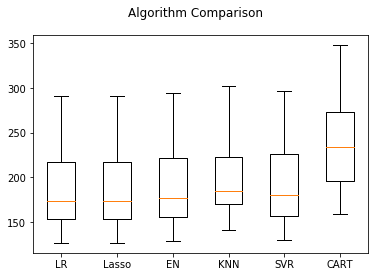

In [60]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [61]:
# To use KFold instead of RepeatedStratifiedKFold
from sklearn.model_selection import KFold

# define models
k_models = []

k_models.append(('LR', LinearRegression()))
k_models.append(('Lasso', Lasso()))
k_models.append(('EN', ElasticNet()))
k_models.append(('KNN', KNeighborsRegressor()))
k_models.append(('SVR', SVR()))
k_models.append(('CART', DecisionTreeRegressor()))

# empty lists to store model names and results
k_results = []
k_names = []

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

for k_name, k_model in k_models:
    kfold_cv = KFold(n_splits=num_fold, random_state=seed)
    k_cv_results = cross_val_score(k_model, trainCopyTransformed, trainCopyY, cv=kfold_cv, scoring=scoring)
    
    
    # output to evaluate results
    k_rmse = np.sqrt(-k_cv_results)
    
        # append each model results into empty lists created
    k_results.append(k_rmse)
    k_names.append(k_name)
    
    see_k_results = '%s: %f (%f)' % (k_name, k_rmse.mean(), k_rmse.std())
    print(see_k_results)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 185.577978 (42.146054)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Lasso: 185.722977 (42.158973)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


EN: 188.945314 (41.984100)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 201.981927 (33.236707)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVR: 191.865163 (42.229279)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 215.704516 (37.991186)


**Linear Regression still performed the best.**

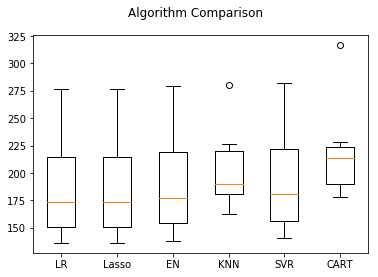

In [62]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(k_results)
ax.set_xticklabels(k_names)
plt.show()

In [63]:
# Try some Ensemble Techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


e_models = []

e_models.append(('RF', RandomForestRegressor()))
e_models.append(('GB', GradientBoostingRegressor()))

# empty lists to store model names and results
e_results = []
e_names = []

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

for e_name, e_model in e_models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    e_cv_results = cross_val_score(e_model, trainCopyTransformed, trainCopyY, cv=kfold, scoring=scoring)
    
    # output to evaluate results
    e_rmse = np.sqrt(-e_cv_results)
    
    # append each model results into empty lists created
    e_results.append(e_rmse)
    e_names.append(e_name)
    
    see_e_results = '%s: %f (%f)' % (e_name, e_rmse.mean(), e_rmse.std())
    print(see_e_results)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 200.236930 (40.722899)


C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GB: 183.175743 (42.261592)


**GradientBoostingRegressor performed best so far with 183.18 in RMSE score**

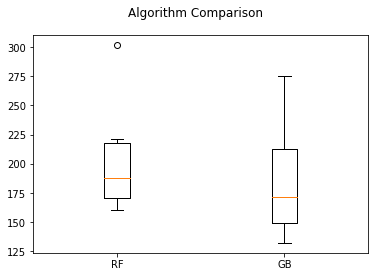

In [64]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(e_results)
ax.set_xticklabels(e_names)
plt.show()

### Fine Tune the best Model with GridSeearchCV

In [65]:
# import relevant libraries
from sklearn.model_selection import GridSearchCV

# set parameters
estimators = [100, 150, 200, 250, 300]
loss = ['ls', 'quantile', 'huber']
max_feat = ['sqrt', 'log2']
param_grid = dict(loss=loss, n_estimators=estimators, max_features=max_feat)

# instantiate model
model = GradientBoostingRegressor()

# Kfold and cross validation parameters
seed = 234
num_fold = 10
scoring = 'neg_mean_squared_error'

# gridsearchCV
kfold = KFold(n_splits=num_fold, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(trainCopyTransformed, trainCopyY)

# print result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -35067.317209 using {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 300}
-35217.779679 (16891.350560) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 100}
-35218.889668 (16718.337552) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 150}
-35243.022485 (16899.100820) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 200}
-35116.523597 (16963.546686) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 250}
-35144.783906 (16874.731167) with: {'loss': 'ls', 'max_features': 'sqrt', 'n_estimators': 300}
-35143.207686 (16900.032341) with: {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 100}
-35188.679914 (16973.869863) with: {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 150}
-35210.930069 (16783.294715) with: {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 200}
-35273.418187 (16891.072544) with: {'loss': 'ls', 'max_features': 'log2', 'n_estimators': 250}
-35067.317209 (16836.412355) with: {'loss': 'ls', 'max_feat

**Now we will perform data transformation and model training (with the best hyperparameter combo) through a single pipeline on the data (the original training set).**

In [66]:
# subset predictors from target
trainX = Train.drop(['Price'], axis=1)
trainY = Train['Price']
trainX.head()

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
14983,8235445,2013-08-18,Downtown Brooklyn Living,Brooklyn,Apartment,85.0,Entire home/apt,11201.0,4.0,1,28,87.0
14303,7452455,2013-07-13,MANHATTAN STUDIO 10 MIN TO DOWNTOWN,Manhattan,Apartment,85.0,Entire home/apt,10035.0,3.0,1,32,85.0
5560,1689781,2012-02-02,1 bedroom by Riverbank Park,Manhattan,Apartment,90.0,Private room,10031.0,1.0,1,4,90.0
6603,2202858,2012-04-23,Bright One Bed Apt,Brooklyn,Apartment,NaN,Entire home/apt,11225.0,1.0,1,0,NaN
30233,41938451,2015-08-19,"Clean, Modern, Brooklyn Apt",Brooklyn,Apartment,100.0,Private room,11213.0,1.0,1,3,100.0


In [67]:
# model pipeline
final_model_pipeline = Pipeline([('preparation', TidyData(age_missing_values=True)),
                                 ('transformer', fullPipe),
                                 ('model', GradientBoostingRegressor(loss='ls', max_features='log2', n_estimators=300))])

final_model_pipeline.fit(trainX, trainY)

Pipeline(steps=[('preparation', TidyData()),
                ('transformer',
                 ColumnTransformer(transformers=[('Nums',
                                                  Pipeline(steps=[('ImputeNum',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['Beds', 'Number Of Reviews',
                                                   'Review Scores Rating',
                                                   'Host Since']),
                                                 ('Cats',
                                                  Pipeline(steps=[('ImputeCat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                 

In [68]:
# Take out target variable from the final test set
Test = Test.drop(['Price'], axis=1)
Test.head()

,Host Id,Host Since,Name,Borough,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
20546,16861530,2014-06-16,Tigui's Room 2,Queens,Apartment,NaN,Private room,11106.0,2.0,1,0,NaN
5032,1492900,2011-12-11,1-bedroom Greenwich Village,Manhattan,Apartment,95.0,Entire home/apt,10003.0,1.0,1,10,98.0
2600,567226,2011-05-08,Feels like home with park view,Manhattan,Apartment,95.0,Entire home/apt,10034.0,1.0,1,13,95.0
13703,6885157,2013-06-12,nice room in bedstuy 6,Brooklyn,Apartment,80.0,Private room,11216.0,1.0,1,26,83.0
6681,2248340,2012-04-29,Luxury Penthouse with Terrace,Brooklyn,Apartment,95.0,Entire home/apt,11211.0,2.0,1,3,99.0


In [69]:
final_model_pipeline.predict(Test)

array([167.87978034, 176.43298349, 173.63368101, ..., 124.14629972,
       212.08477108, 126.80228127])

In [70]:
# save the final model
import joblib as jb

jb.dump(final_model_pipeline, 'airbnbModel.sav', compress=1)

['airbnbModel.sav']

### DONE